<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Wearable-for-Myocardial-Infarction-Prediction-Using-HRV/blob/main/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ucimachinelearning/photoplethysmography-ppg-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/photoplethysmography-ppg-dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# List the contents of the downloaded directory
print(os.listdir(path))


['PPG_Dataset.csv']


In [ ]:
# Construct the full path to the CSV file
csv_file_path = os.path.join(path, 'PPG_Dataset.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label
0,-0.015552,0.016963,0.013575,0.027204,0.068154,0.129259,0.127915,0.345174,0.197811,0.167651,...,-0.426464,-0.346976,-0.132168,-0.252098,-0.241969,-0.134235,-0.091327,-0.081713,-0.057693,MI
1,0.002323,0.002754,0.022539,0.228807,0.107751,0.034439,0.086007,0.155667,0.163327,0.223759,...,-0.169345,-0.356808,-0.338996,-0.292489,-0.152872,-0.156076,-0.103265,-0.041579,-0.044272,MI
2,0.050481,-0.339781,0.265111,0.045092,0.040086,0.087173,0.092814,0.099586,-0.143305,0.164186,...,-0.401426,-0.402333,-0.373426,-0.303710,0.008599,-0.180633,-0.143135,-0.084758,0.060668,MI
3,0.023882,0.016561,0.248547,0.054567,0.128032,0.085954,0.107359,0.207137,0.174547,-0.100118,...,-0.390700,-0.353882,-0.294014,-0.267005,-0.242258,-0.186946,-0.173718,0.101331,0.063555,MI
4,-0.058591,0.171551,0.057262,0.270869,0.138357,0.078509,0.062504,0.104447,0.134795,0.194248,...,-0.391598,-0.334490,-0.326873,-0.249881,-0.210052,-0.194763,-0.415365,0.015432,0.010321,MI


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,...,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000
mean,-0.005708,0.017970,0.033201,0.056708,0.071832,0.089736,0.110175,0.130679,0.148245,0.163338,...,-0.353296,-0.325031,-0.287979,-0.250430,-0.212872,-0.172467,-0.130904,-0.090724,-0.045809,-0.004907
std,0.065861,0.061506,0.064567,0.060762,0.059521,0.065979,0.059234,0.061158,0.061926,0.061638,...,0.121028,0.119636,0.110781,0.101694,0.098563,0.089035,0.074426,0.071760,0.064757,0.065110
min,-0.376140,-0.342394,-0.328278,-0.330451,-0.291035,-0.279629,-0.229686,-0.231586,-0.224004,-0.198668,...,-0.836645,-0.777268,-0.748191,-0.713903,-0.642188,-0.630978,-0.523685,-0.489191,-0.436499,-0.384475
25%,-0.018485,0.002392,0.019900,0.040955,0.058416,0.075981,0.095981,0.114725,0.132857,0.149877,...,-0.457881,-0.419973,-0.376735,-0.329924,-0.280222,-0.225298,-0.172863,-0.118387,-0.061463,-0.017480
50%,-0.001078,0.020138,0.037462,0.058067,0.075507,0.093184,0.113060,0.131897,0.149928,0.167474,...,-0.280993,-0.256443,-0.226706,-0.199879,-0.171214,-0.143668,-0.113097,-0.078792,-0.039714,-0.001028
75%,0.016457,0.037312,0.053817,0.073802,0.091474,0.110968,0.130357,0.149249,0.166125,0.184307,...,-0.248326,-0.223195,-0.195184,-0.167371,-0.138041,-0.110256,-0.083802,-0.053427,-0.021310,0.016677
max,0.274361,0.293040,0.302497,0.345651,0.351911,0.376147,0.409745,0.403988,0.422486,0.445640,...,-0.178149,-0.161479,-0.106956,-0.040345,0.017529,0.044643,0.092616,0.141401,0.215511,0.263300


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label
0,-0.015552,0.016963,0.013575,0.027204,0.068154,0.129259,0.127915,0.345174,0.197811,0.167651,...,-0.426464,-0.346976,-0.132168,-0.252098,-0.241969,-0.134235,-0.091327,-0.081713,-0.057693,MI
1,0.002323,0.002754,0.022539,0.228807,0.107751,0.034439,0.086007,0.155667,0.163327,0.223759,...,-0.169345,-0.356808,-0.338996,-0.292489,-0.152872,-0.156076,-0.103265,-0.041579,-0.044272,MI
2,0.050481,-0.339781,0.265111,0.045092,0.040086,0.087173,0.092814,0.099586,-0.143305,0.164186,...,-0.401426,-0.402333,-0.373426,-0.303710,0.008599,-0.180633,-0.143135,-0.084758,0.060668,MI
3,0.023882,0.016561,0.248547,0.054567,0.128032,0.085954,0.107359,0.207137,0.174547,-0.100118,...,-0.390700,-0.353882,-0.294014,-0.267005,-0.242258,-0.186946,-0.173718,0.101331,0.063555,MI
4,-0.058591,0.171551,0.057262,0.270869,0.138357,0.078509,0.062504,0.104447,0.134795,0.194248,...,-0.391598,-0.334490,-0.326873,-0.249881,-0.210052,-0.194763,-0.415365,0.015432,0.010321,MI


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
1996,0
1997,0
1998,0
1999,0


In [ ]:
pip install neurokit2

In [ ]:
from joblib import Parallel, delayed

In [ ]:
print(df.shape)
print(df.columns)


(2576, 2001)
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       'Label'],
      dtype='object', length=2001)


In [ ]:
# DataFrame with only PPG signals (columns 0 to 1999)
df_signals = df.iloc[:, 0:2000]

# DataFrame with only the label column (2000)
df_labels = df.iloc[:, 2000]

In [ ]:
print(df_signals.shape)  # (2567, 2000)
print(df_labels.shape)   # (2567, 1)


(2576, 2000)
(2576,)


In [ ]:
df_signals=pd.DataFrame(df_signals)
df_labels=pd.DataFrame(df_labels)

In [ ]:
df_signals.head()


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-0.015552,0.016963,0.013575,0.027204,0.068154,0.129259,0.127915,0.345174,0.197811,0.167651,...,-0.453917,-0.426464,-0.346976,-0.132168,-0.252098,-0.241969,-0.134235,-0.091327,-0.081713,-0.057693
1,0.002323,0.002754,0.022539,0.228807,0.107751,0.034439,0.086007,0.155667,0.163327,0.223759,...,-0.469328,-0.169345,-0.356808,-0.338996,-0.292489,-0.152872,-0.156076,-0.103265,-0.041579,-0.044272
2,0.050481,-0.339781,0.265111,0.045092,0.040086,0.087173,0.092814,0.099586,-0.143305,0.164186,...,-0.430625,-0.401426,-0.402333,-0.373426,-0.303710,0.008599,-0.180633,-0.143135,-0.084758,0.060668
3,0.023882,0.016561,0.248547,0.054567,0.128032,0.085954,0.107359,0.207137,0.174547,-0.100118,...,-0.472787,-0.390700,-0.353882,-0.294014,-0.267005,-0.242258,-0.186946,-0.173718,0.101331,0.063555
4,-0.058591,0.171551,0.057262,0.270869,0.138357,0.078509,0.062504,0.104447,0.134795,0.194248,...,-0.506430,-0.391598,-0.334490,-0.326873,-0.249881,-0.210052,-0.194763,-0.415365,0.015432,0.010321


In [ ]:
df_labels.head()

,Label
0,MI
1,MI
2,MI
3,MI
4,MI


In [ ]:
import neurokit2 as nk

def process_signal(signal, label):
    clean = nk.ppg_clean(signal, method="nabian2018")
    _, info = nk.ppg_process(clean, sampling_rate=100)
    peaks = info['PPG_Peaks']
    hrv_time = nk.hrv_time(peaks, sampling_rate=100)
    hrv_freq = nk.hrv_frequency(peaks, sampling_rate=100)
    hrv_nonlinear = nk.hrv_nonlinear(peaks, sampling_rate=100)
    features = pd.concat([hrv_time, hrv_freq, hrv_nonlinear], axis=1)
    features['label'] = label
    return features

features_list = Parallel(n_jobs=4)(delayed(process_signal)(row.values, df_labels.iloc[index, 0])
                                   for index, row in df_signals.iterrows())

df_final = pd.concat(features_list, axis=0).reset_index(drop=True)

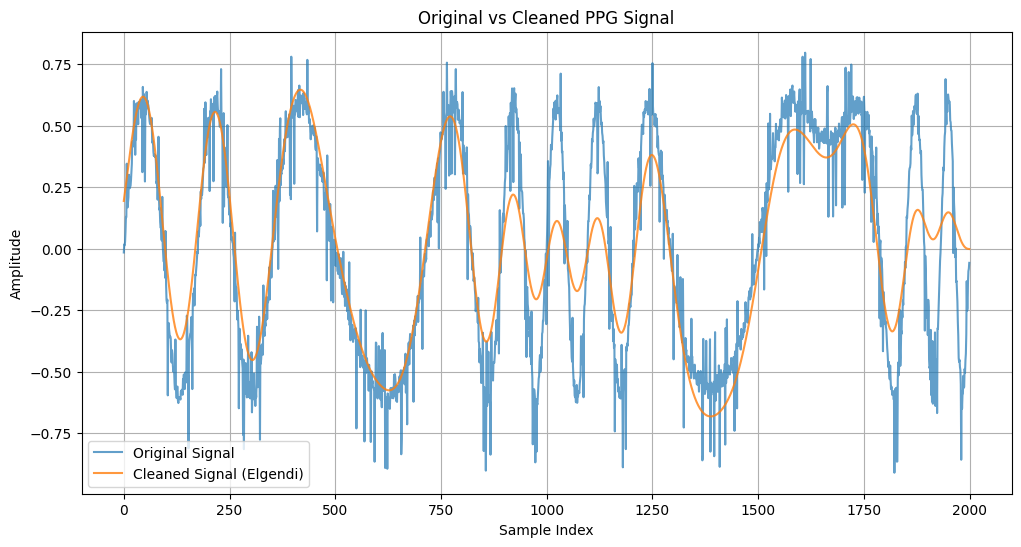

In [ ]:
# prompt: how to see the wav e form after  clean = nk.ppg_clean(signal, method="elgendi"

import matplotlib.pyplot as plt
# Let's assume we take the first signal from the dataframe for visualization
signal_to_plot = df_signals.iloc[0, :].values

# Clean the signal using the "elgendi" method
clean = nk.ppg_clean(signal_to_plot, method="elgendi")

# Visualize the original and cleaned signal
plt.figure(figsize=(12, 6))
plt.plot(signal_to_plot, label='Original Signal', alpha=0.7)
plt.plot(clean, label='Cleaned Signal (Elgendi)', alpha=0.8)
plt.title('Original vs Cleaned PPG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

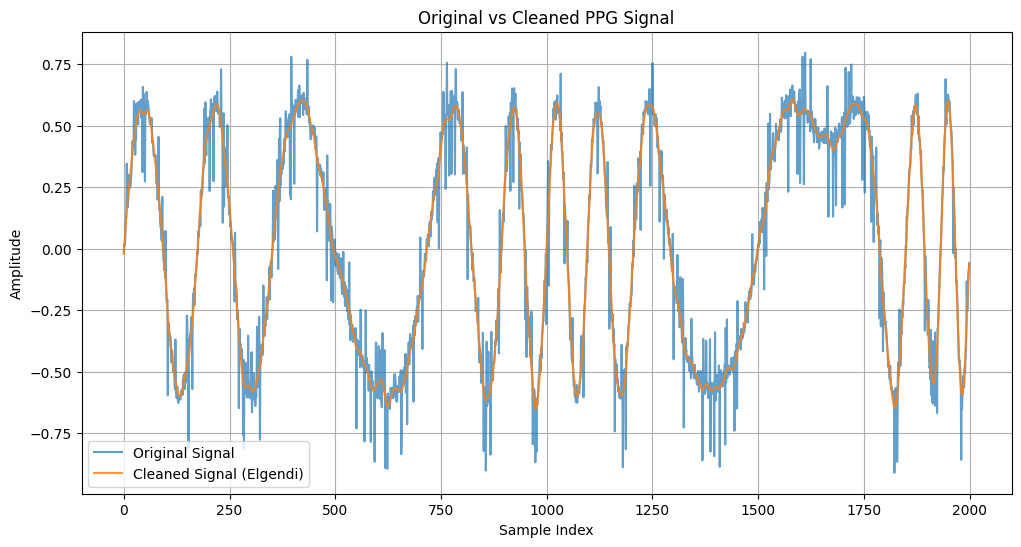

In [ ]:
# prompt: how to see the wav e form after  clean = nk.ppg_clean(signal, method="elgendi"

import matplotlib.pyplot as plt
# Let's assume we take the first signal from the dataframe for visualization
signal_to_plot = df_signals.iloc[0, :].values

# Clean the signal using the "elgendi" method
clean = nk.ppg_clean(signal_to_plot, method="nabian2018")

# Visualize the original and cleaned signal
plt.figure(figsize=(12, 6))
plt.plot(signal_to_plot, label='Original Signal', alpha=0.7)
plt.plot(clean, label='Cleaned Signal (Elgendi)', alpha=0.8)
plt.title('Original vs Cleaned PPG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_final.head()

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC,label,HRV_DFA_alpha2
0,1454.615385,688.096594,NaN,NaN,NaN,NaN,NaN,NaN,903.317958,940.510822,...,1.984547,NaN,NaN,NaN,2.282931,NaN,3.664463,1.423246,MI,NaN
1,1727.272727,943.441476,NaN,NaN,NaN,NaN,NaN,NaN,1244.885537,1308.152217,...,1.608033,NaN,NaN,NaN,1.799821,NaN,3.200723,1.257975,MI,NaN
2,1577.500000,800.092324,NaN,NaN,NaN,NaN,NaN,NaN,1024.593046,1071.246513,...,1.573166,NaN,NaN,NaN,2.816791,NaN,2.103595,1.194988,MI,NaN
3,1588.333333,752.448528,NaN,NaN,NaN,NaN,NaN,NaN,914.767730,955.040218,...,1.511236,NaN,NaN,NaN,2.239972,NaN,2.180758,1.194988,MI,NaN
4,1722.727273,1010.871811,NaN,NaN,NaN,NaN,NaN,NaN,1381.129972,1453.013726,...,1.428793,NaN,NaN,NaN,1.742835,NaN,2.917735,1.572469,MI,NaN


In [ ]:
df_final.isnull().sum()

,0
HRV_MeanNN,0
HRV_SDNN,0
HRV_SDANN1,2576
HRV_SDNNI1,2576
HRV_SDANN2,2576
...,...
HRV_HFD,2576
HRV_KFD,0
HRV_LZC,0
label,0


In [ ]:
# Find columns with no NaN values
columns_without_nan = df_final.columns[df_final.notna().all()]

num_columns_without_nan = len(columns_without_nan)
print("Number of columns without any NaN:", num_columns_without_nan)
print(columns_without_nan)



Number of columns without any NaN: 58
Index(['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN',
       'HRV_SDRMSSD', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_pNN50', 'HRV_pNN20',
       'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_HF', 'HRV_TP',
       'HRV_HFn', 'HRV_LnHF', 'HRV_SD1', 'HRV_SD2', 'HRV_SD1SD2', 'HRV_S',
       'HRV_CSI', 'HRV_CVI', 'HRV_CSI_Modified', 'HRV_PIP', 'HRV_IALS',
       'HRV_PSS', 'HRV_PAS', 'HRV_GI', 'HRV_SI', 'HRV_AI', 'HRV_PI', 'HRV_C1d',
       'HRV_C1a', 'HRV_SD1d', 'HRV_SD1a', 'HRV_C2d', 'HRV_C2a', 'HRV_SD2d',
       'HRV_SD2a', 'HRV_Cd', 'HRV_Ca', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_ApEn',
       'HRV_SampEn', 'HRV_ShanEn', 'HRV_FuzzyEn', 'HRV_CD', 'HRV_KFD',
       'HRV_LZC', 'label'],
      dtype='object')


In [ ]:
print('label' in df_final.columns)  # Should print: True


True


In [ ]:
for col in df_final.columns:
    print(f'[{col}]')


[HRV_MeanNN]
[HRV_SDNN]
[HRV_SDANN1]
[HRV_SDNNI1]
[HRV_SDANN2]
[HRV_SDNNI2]
[HRV_SDANN5]
[HRV_SDNNI5]
[HRV_RMSSD]
[HRV_SDSD]
[HRV_CVNN]
[HRV_CVSD]
[HRV_MedianNN]
[HRV_MadNN]
[HRV_MCVNN]
[HRV_IQRNN]
[HRV_SDRMSSD]
[HRV_Prc20NN]
[HRV_Prc80NN]
[HRV_pNN50]
[HRV_pNN20]
[HRV_MinNN]
[HRV_MaxNN]
[HRV_HTI]
[HRV_TINN]
[HRV_ULF]
[HRV_VLF]
[HRV_LF]
[HRV_HF]
[HRV_VHF]
[HRV_TP]
[HRV_LFHF]
[HRV_LFn]
[HRV_HFn]
[HRV_LnHF]
[HRV_SD1]
[HRV_SD2]
[HRV_SD1SD2]
[HRV_S]
[HRV_CSI]
[HRV_CVI]
[HRV_CSI_Modified]
[HRV_PIP]
[HRV_IALS]
[HRV_PSS]
[HRV_PAS]
[HRV_GI]
[HRV_SI]
[HRV_AI]
[HRV_PI]
[HRV_C1d]
[HRV_C1a]
[HRV_SD1d]
[HRV_SD1a]
[HRV_C2d]
[HRV_C2a]
[HRV_SD2d]
[HRV_SD2a]
[HRV_Cd]
[HRV_Ca]
[HRV_SDNNd]
[HRV_SDNNa]
[HRV_DFA_alpha1]
[HRV_MFDFA_alpha1_Width]
[HRV_MFDFA_alpha1_Peak]
[HRV_MFDFA_alpha1_Mean]
[HRV_MFDFA_alpha1_Max]
[HRV_MFDFA_alpha1_Delta]
[HRV_MFDFA_alpha1_Asymmetry]
[HRV_MFDFA_alpha1_Fluctuation]
[HRV_MFDFA_alpha1_Increment]
[HRV_ApEn]
[HRV_SampEn]
[HRV_ShanEn]
[HRV_FuzzyEn]
[HRV_MSEn]
[HRV_CMSEn]
[HRV_RCM

In [ ]:
# Step 1: Separate the label column
label_col = df_final[['label']]  # keep label as is

# Step 2: Select only numeric columns
numeric_cols = df_final.select_dtypes(include=['number']).columns

# Step 3: From numeric columns, drop those that have any NaN values
numeric_cols_no_nan = [col for col in numeric_cols if df_final[col].notna().all()]

# Step 4: Create DataFrame with numeric no-NaN columns
df_features = df_final[numeric_cols_no_nan]

# Step 5: Combine numeric features and label column
df_clean = pd.concat([df_features, label_col], axis=1)


In [ ]:


# Step 1: Replace inf and -inf with NaN (to handle them easily)
df_final = df_final.replace([np.inf, -np.inf], np.nan)

# Step 2: Separate label column
label_col = df_final[['label']]

# Step 3: Select only numeric columns
numeric_cols = df_final.select_dtypes(include=['number']).columns

# Step 4: From numeric columns, keep only those without NaN (includes previous inf/-inf replaced)
numeric_cols_no_nan = [col for col in numeric_cols if df_final[col].notna().all()]

# Step 5: Create cleaned features DataFrame
df_features = df_final[numeric_cols_no_nan]

# Step 6: Combine features and label
df_clean = pd.concat([df_features, label_col], axis=1)


In [ ]:
df_clean.head()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_ShanEn,HRV_FuzzyEn,HRV_CD,HRV_KFD,HRV_LZC,label
0,1454.615385,688.096594,903.317958,940.510822,0.473044,0.621001,1340.0,533.736,0.398310,790.0,...,0.614606,436.033473,550.637200,0.087011,3.700440,1.984547,2.282931,3.664463,1.423246,MI
1,1727.272727,943.441476,1244.885537,1308.152217,0.546203,0.720723,1420.0,637.518,0.448956,790.0,...,0.574643,630.848987,733.242873,0.105361,3.459432,1.608033,1.799821,3.200723,1.257975,MI
2,1577.500000,800.092324,1024.593046,1071.246513,0.507190,0.649504,1435.0,489.258,0.340946,532.5,...,0.556719,543.626045,609.226817,0.095310,3.584963,1.573166,2.816791,2.103595,1.194988,MI
3,1588.333333,752.448528,914.767730,955.040218,0.473735,0.575929,1565.0,593.040,0.378939,677.5,...,0.565672,505.354797,576.726012,0.095310,3.584963,1.511236,2.239972,2.180758,1.194988,MI
4,1722.727273,1010.871811,1381.129972,1453.013726,0.586786,0.801711,1450.0,533.736,0.368094,690.0,...,0.559300,689.950401,777.264148,0.033269,3.459432,1.428793,1.742835,2.917735,1.572469,MI


In [ ]:
df_clean.tail()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_ShanEn,HRV_FuzzyEn,HRV_CD,HRV_KFD,HRV_LZC,label
2571,1585.000000,954.125016,1473.813853,1543.365272,0.601972,0.929851,1240.0,667.170,0.538040,787.5,...,0.547009,661.981717,727.442111,0.095310,3.584963,2.082777,1.637881,4.270277,1.493734,MI
2572,1454.615385,736.337959,1163.371537,1212.794169,0.506208,0.799779,1290.0,474.432,0.367777,600.0,...,0.540516,510.998972,554.229377,0.087011,3.700440,2.023982,2.659705,3.140647,1.423246,MI
2573,2051.111111,453.388477,383.291664,407.376186,0.221045,0.186870,1840.0,296.520,0.161152,510.0,...,0.523665,314.067853,329.301547,0.039755,3.169925,2.014187,1.324093,1.744295,1.408856,Normal
2574,1726.363636,1010.378867,1393.682173,1466.071470,0.585264,0.807294,1310.0,518.910,0.396115,660.0,...,0.564920,685.587745,781.217888,0.033269,3.459432,1.588606,1.169316,2.722551,1.572469,MI
2575,2051.111111,445.489743,381.526539,404.525736,0.217194,0.186010,1880.0,207.564,0.110406,450.0,...,0.506013,312.287428,316.065728,0.133531,3.169925,2.070999,1.702946,1.834859,1.408856,Normal


In [ ]:
df_clean.describe()

,HRV_MeanNN,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_ShanEn,HRV_FuzzyEn,HRV_CD,HRV_KFD,HRV_LZC
count,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,...,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000,2576.000000
mean,1828.490701,677.966290,843.970791,887.866034,0.389017,0.493826,1617.191382,436.244690,0.288798,567.307842,...,0.454499,0.545501,464.590127,511.400943,0.067098,3.327393,1.677431,1.478989,2.358649,1.403729
std,228.386956,234.069112,441.684302,460.832305,0.168870,0.297018,253.832912,138.779824,0.129237,176.084357,...,0.032718,0.032718,163.070253,185.648368,0.040355,0.226776,0.257604,0.567071,0.766100,0.130753
min,1274.000000,390.110109,326.783568,345.832329,0.198465,0.159493,1150.000000,148.260000,0.079710,255.000000,...,0.219027,0.421148,204.614184,278.290234,0.005963,2.641604,1.048000,0.205340,1.606085,1.087816
25%,1585.000000,459.264206,413.748111,439.705661,0.224251,0.202498,1360.000000,311.346000,0.166495,410.000000,...,0.433226,0.526781,314.691955,337.739754,0.038879,3.169925,1.488752,1.068669,1.718349,1.408856
50%,1846.000000,621.817254,771.441874,804.678896,0.344268,0.489660,1820.000000,429.954000,0.252531,530.000000,...,0.453369,0.546631,408.506864,470.152738,0.039755,3.277613,1.664126,1.555452,2.018177,1.408856
75%,2052.222222,951.759929,1299.867301,1366.153586,0.566427,0.765175,1860.000000,563.388000,0.408252,725.000000,...,0.473219,0.566774,648.208785,726.465549,0.105361,3.546594,1.837786,1.837482,2.861683,1.493734
max,2060.000000,1086.898005,1657.621288,1729.516266,0.701823,1.134162,1950.000000,785.778000,0.664614,1005.000000,...,0.578852,0.780973,771.724751,840.718740,0.282770,3.906891,2.525223,4.024161,7.336690,1.792481


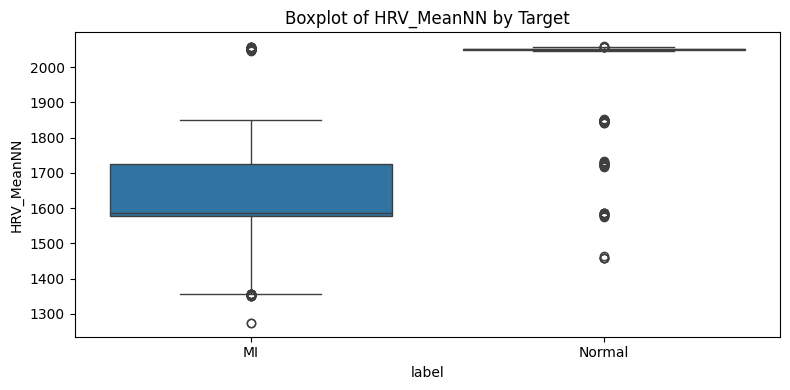

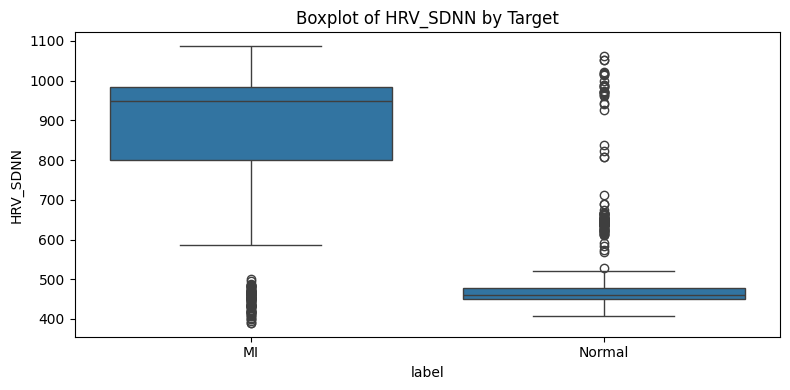

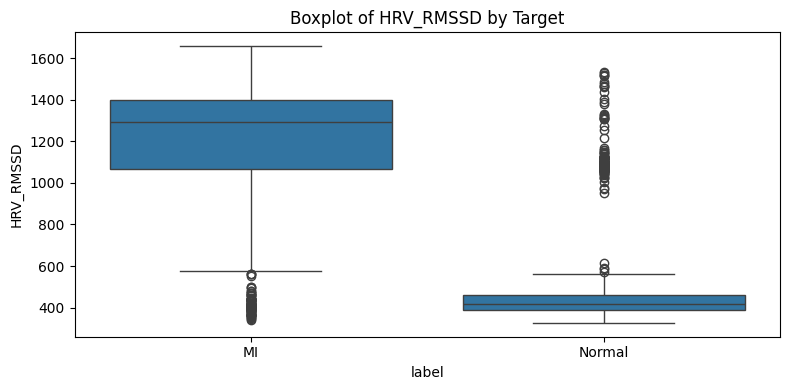

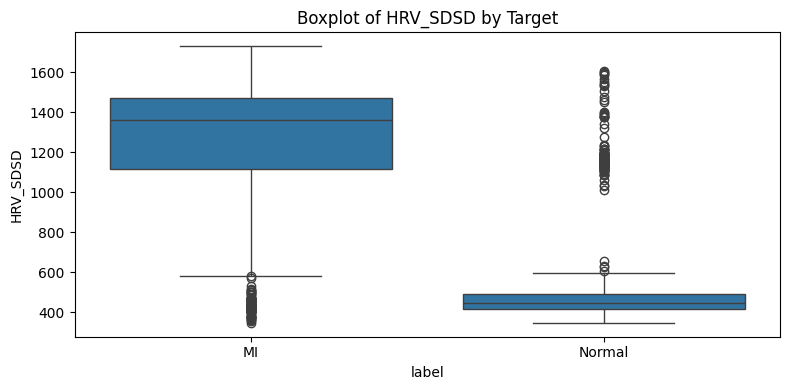

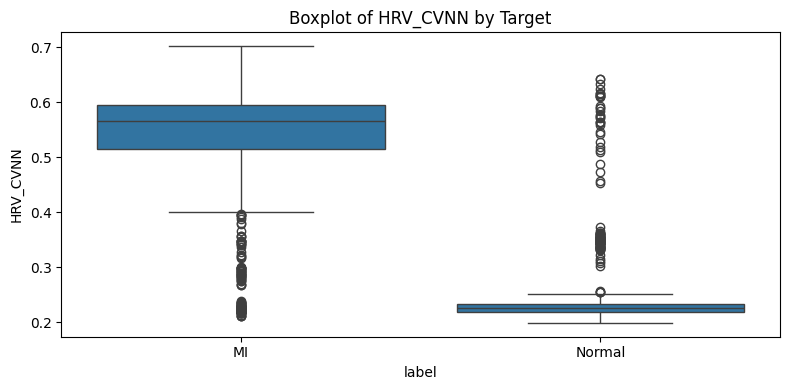

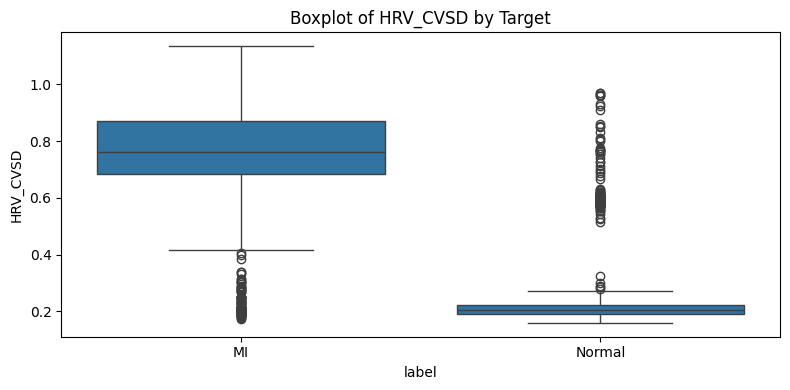

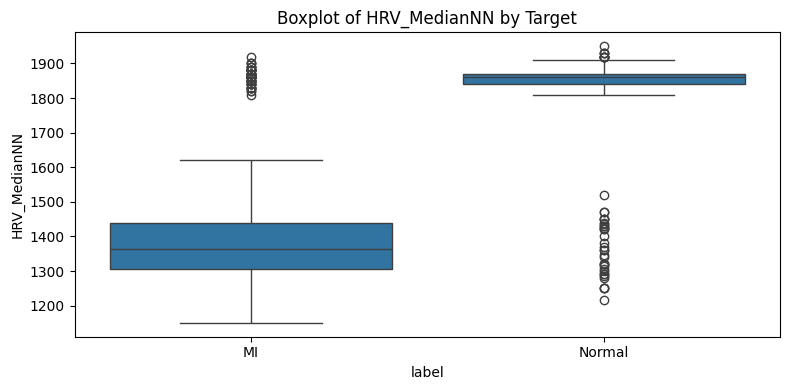

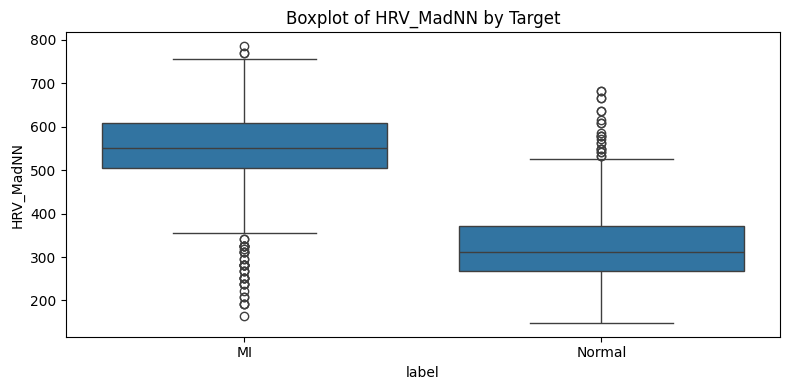

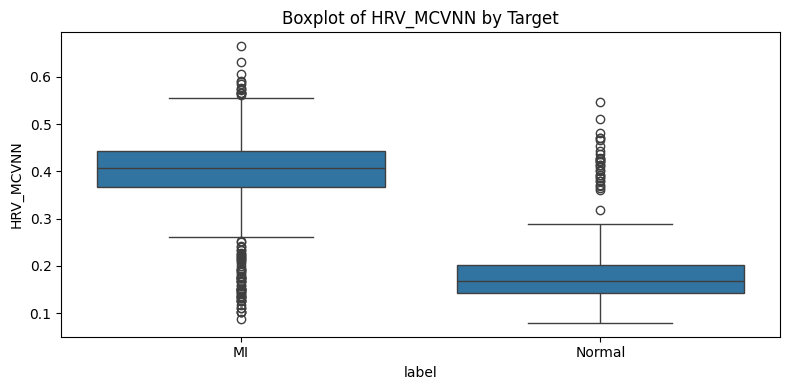

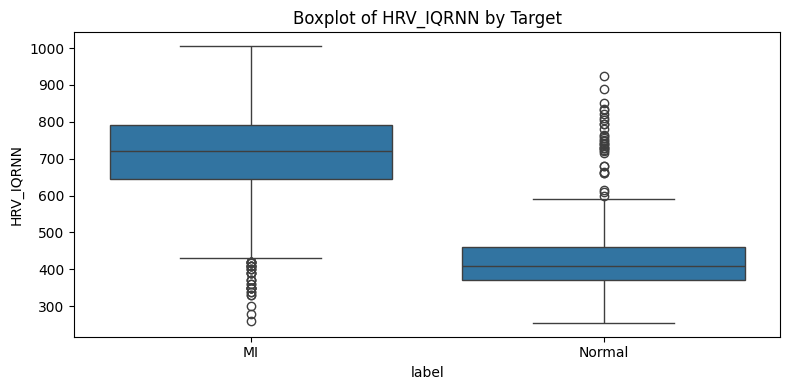

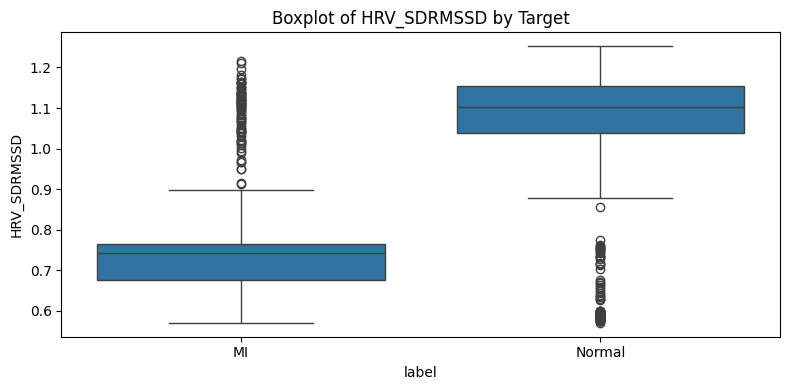

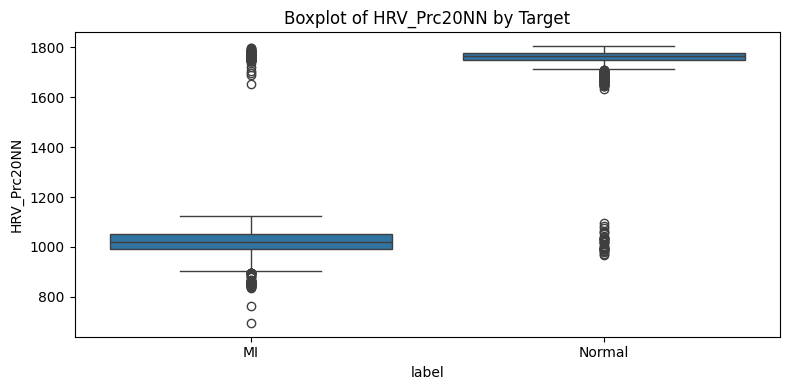

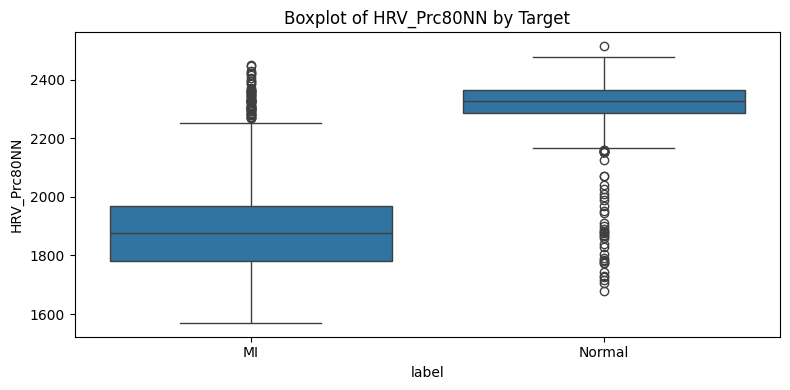

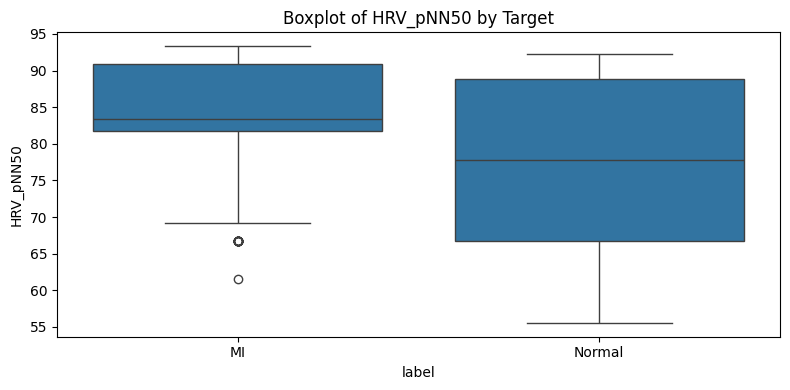

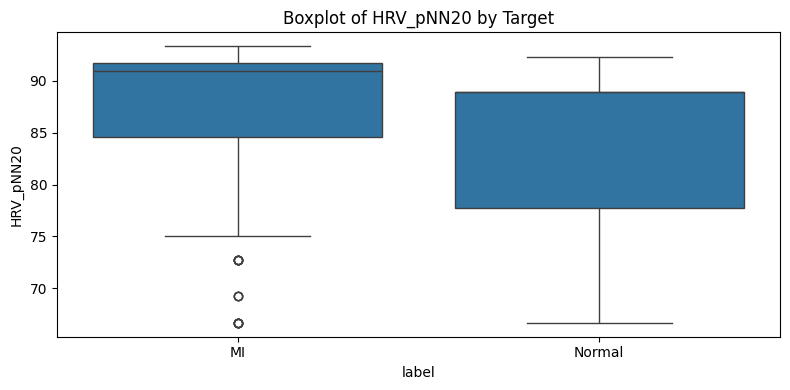

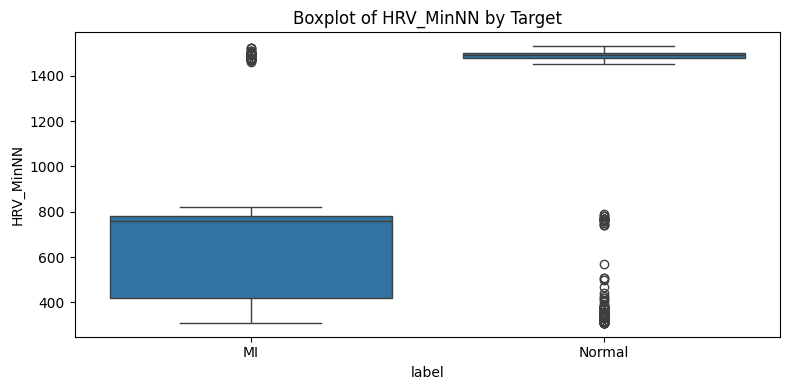

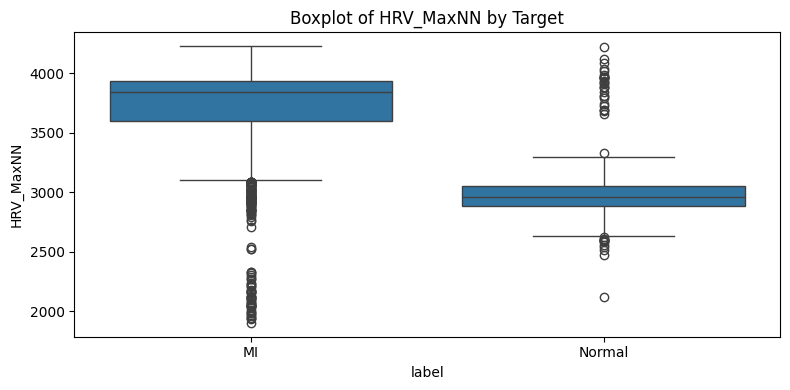

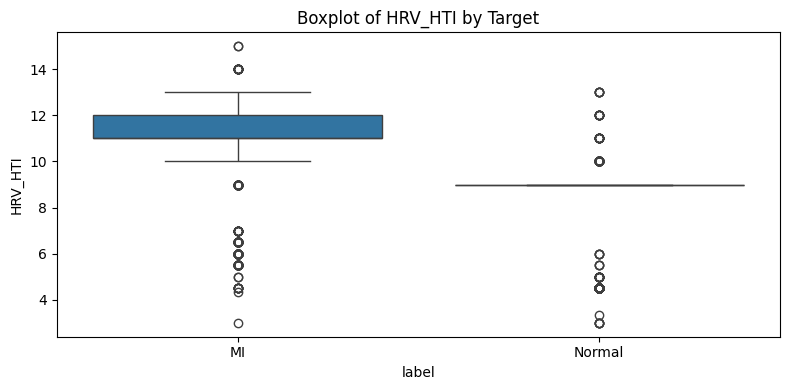

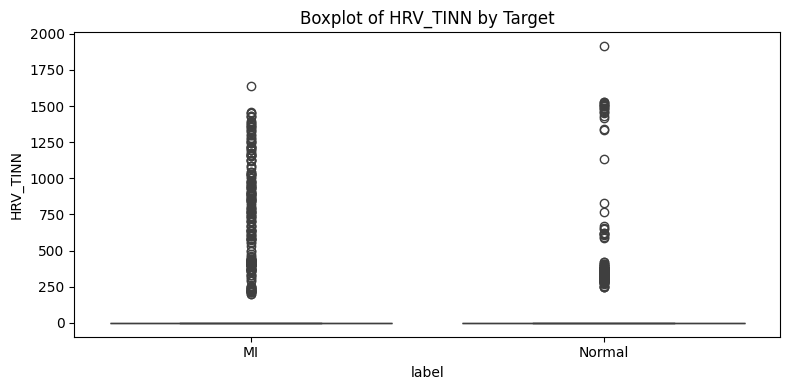

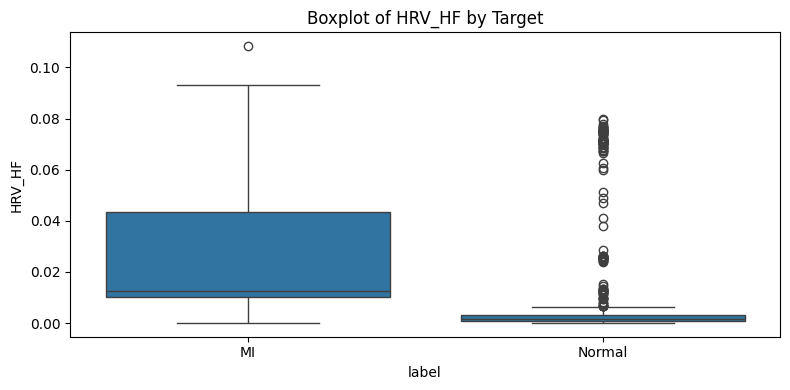

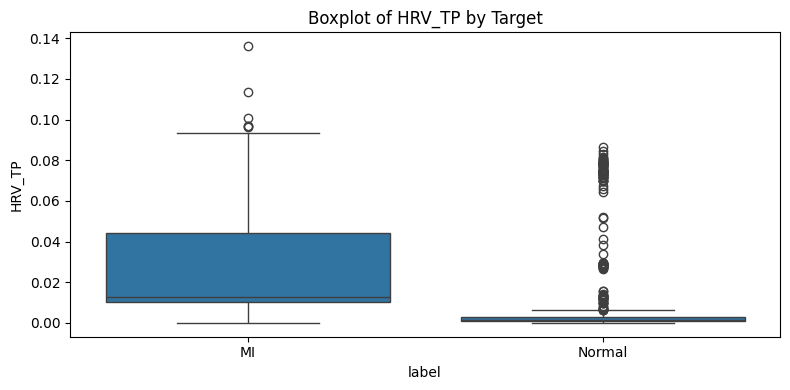

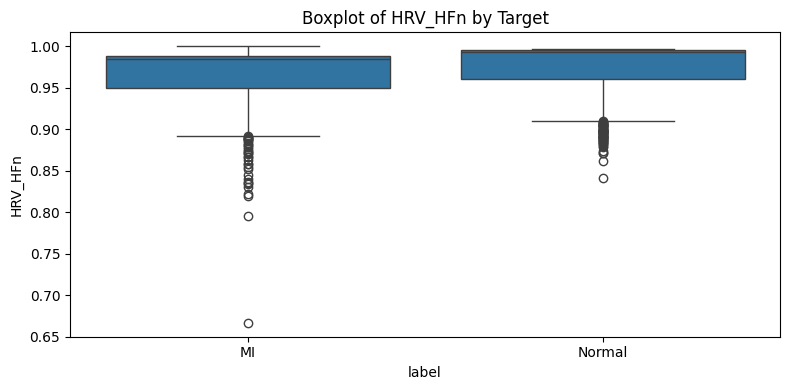

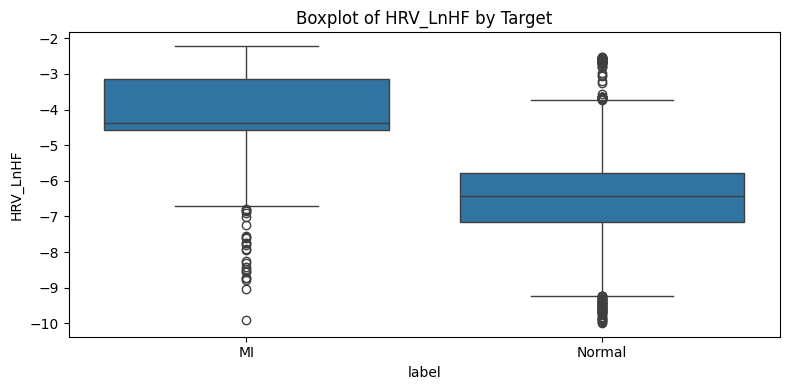

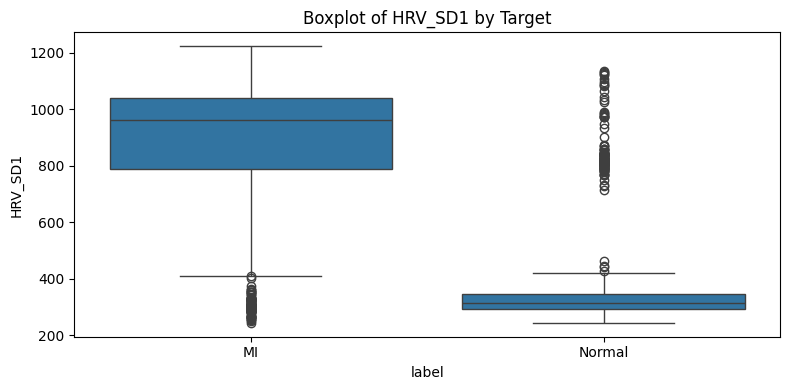

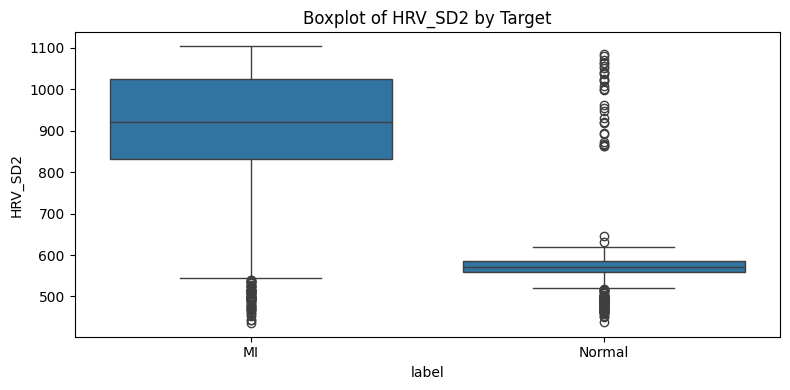

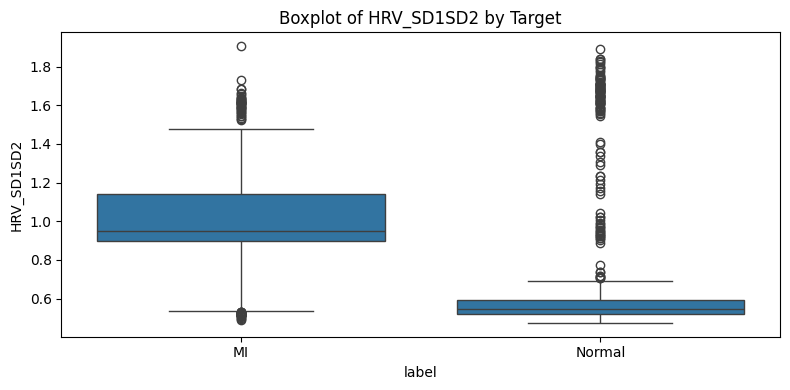

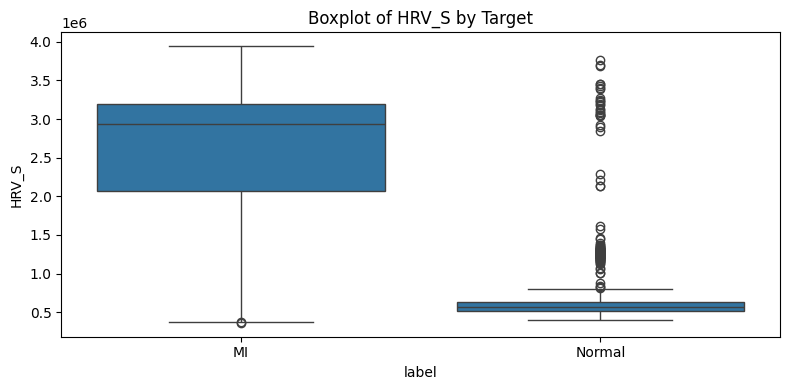

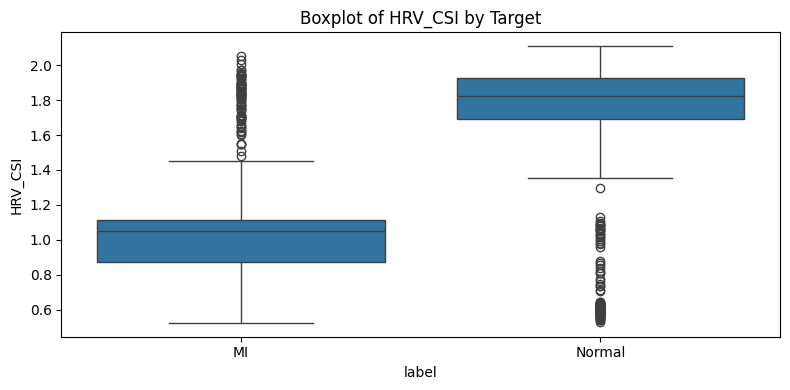

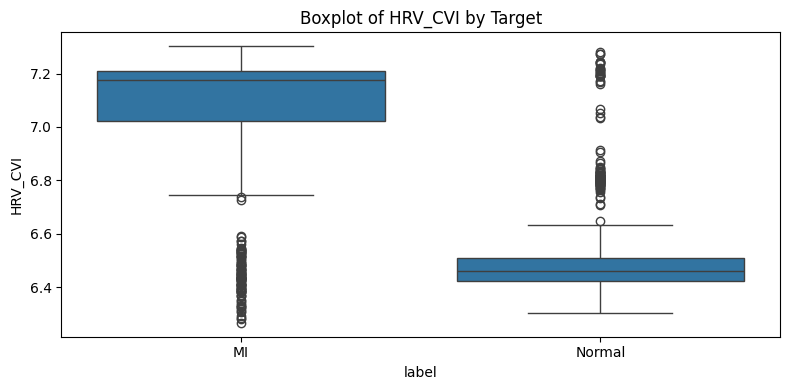

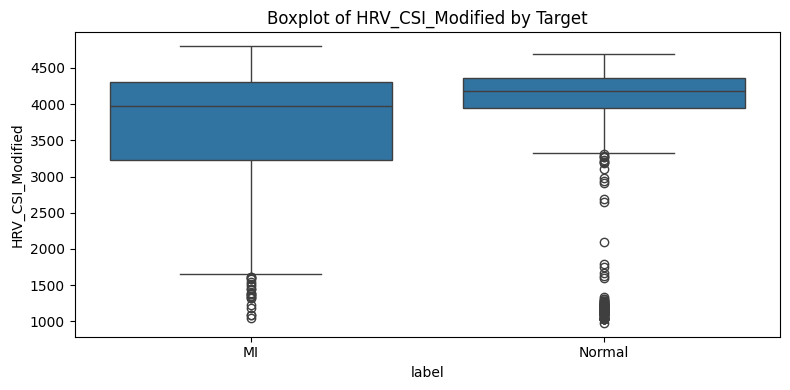

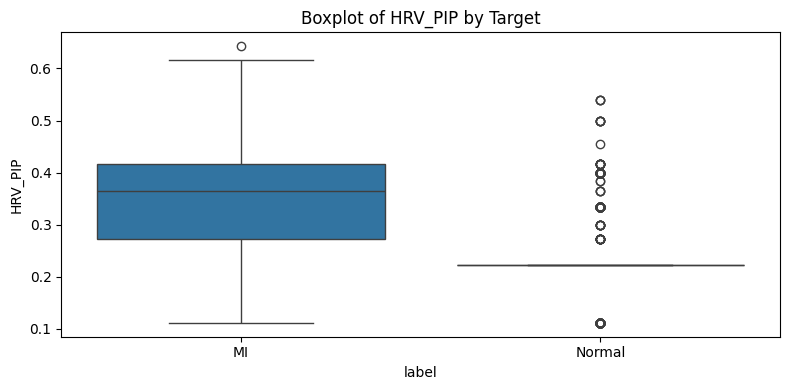

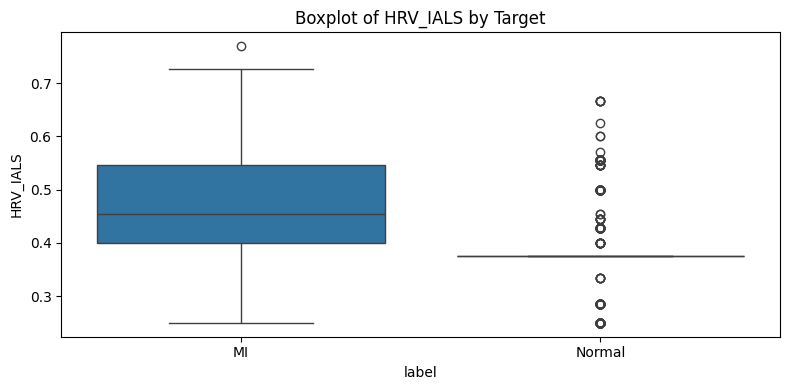

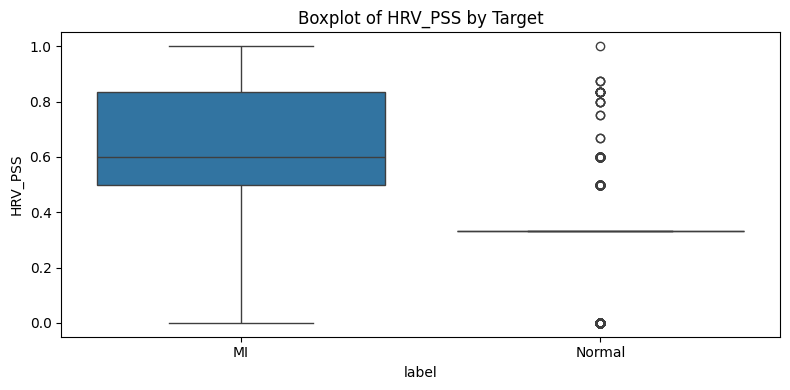

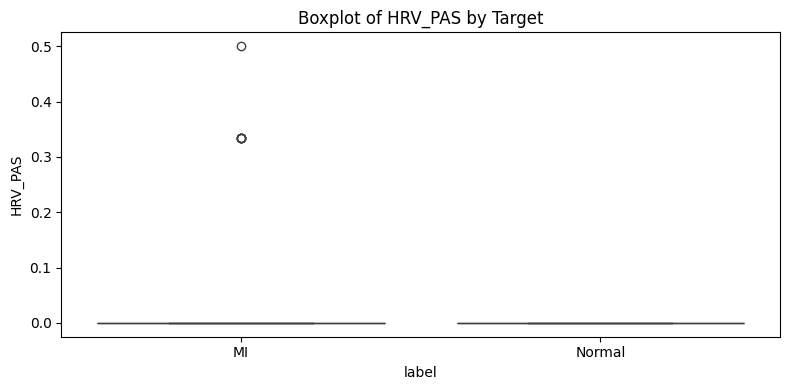

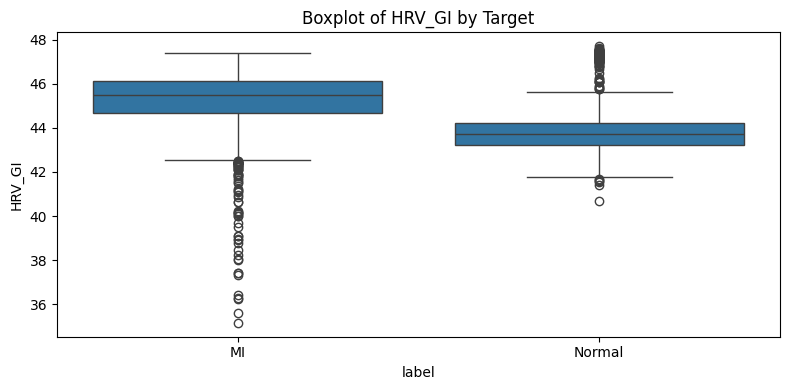

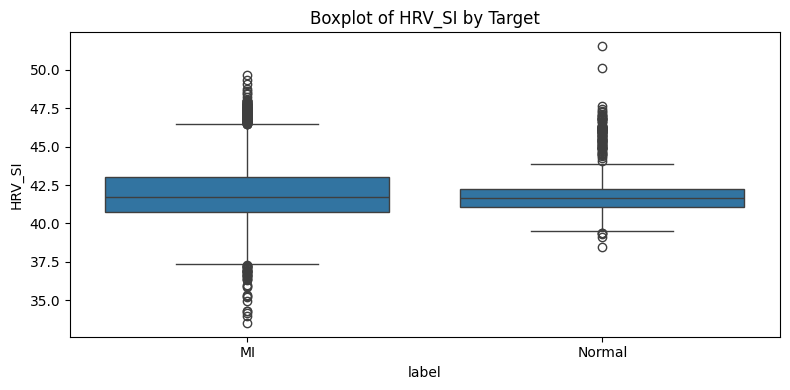

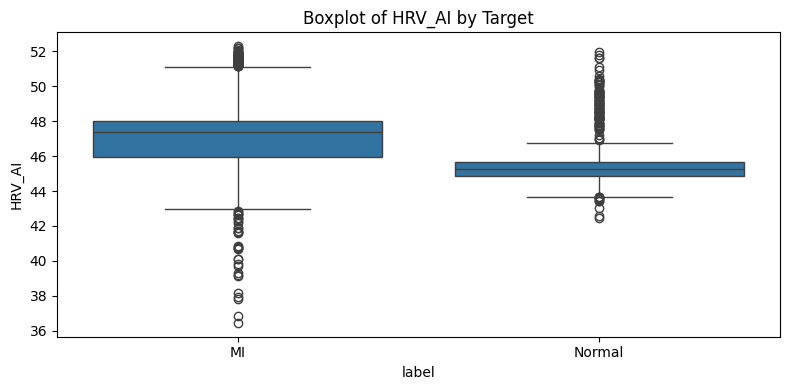

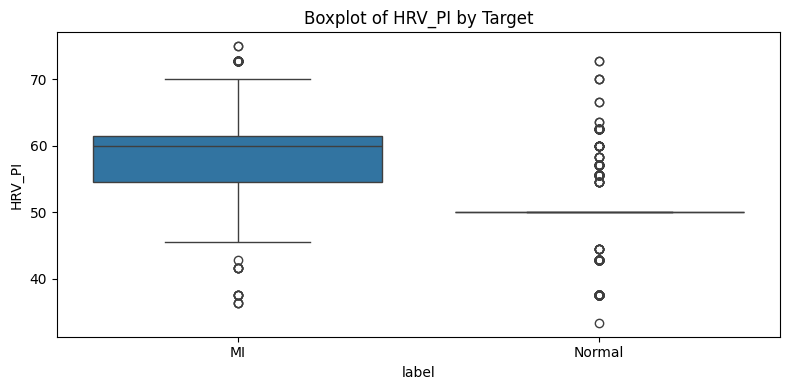

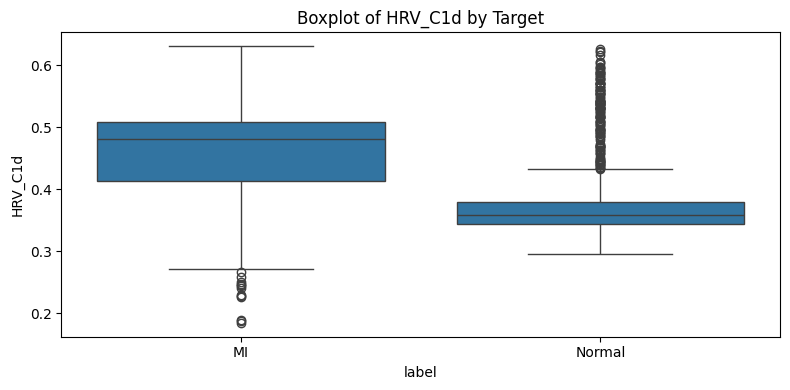

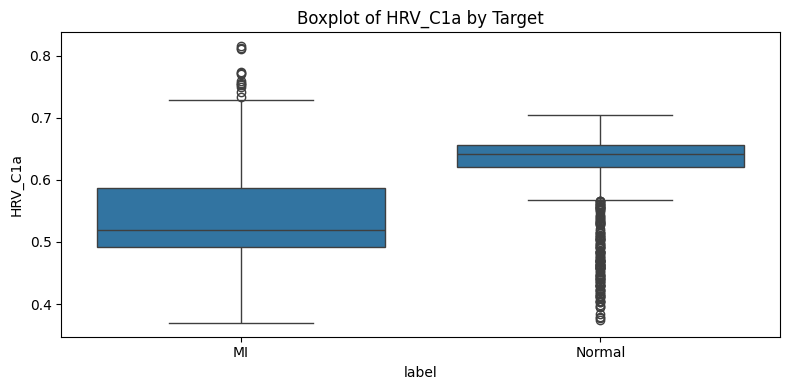

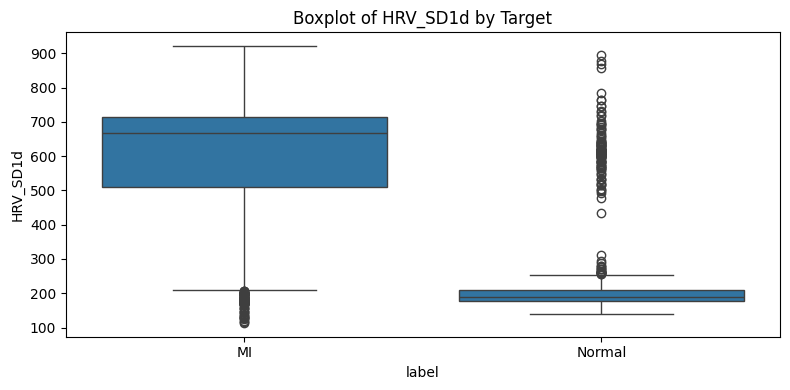

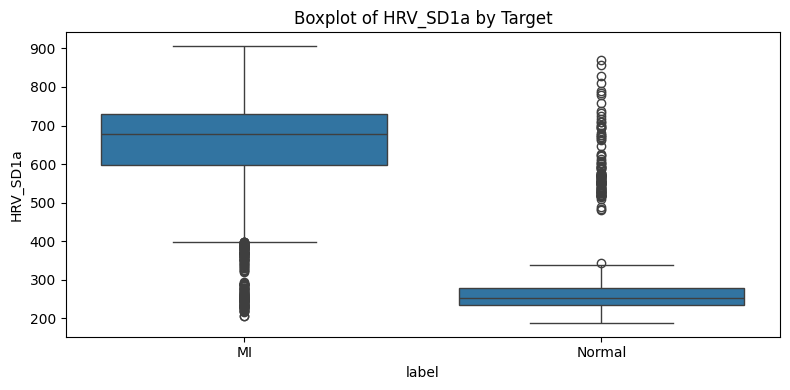

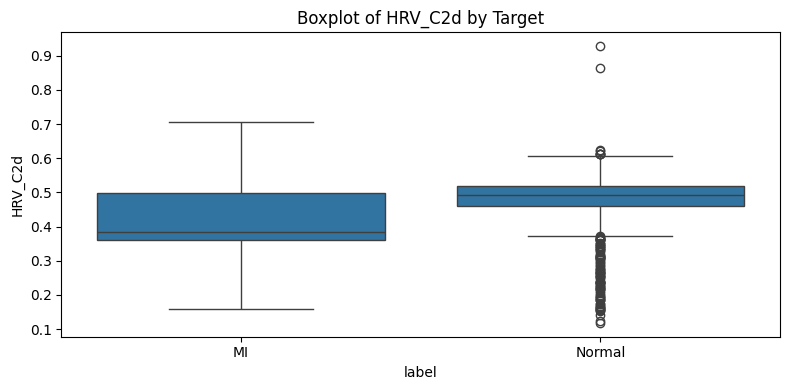

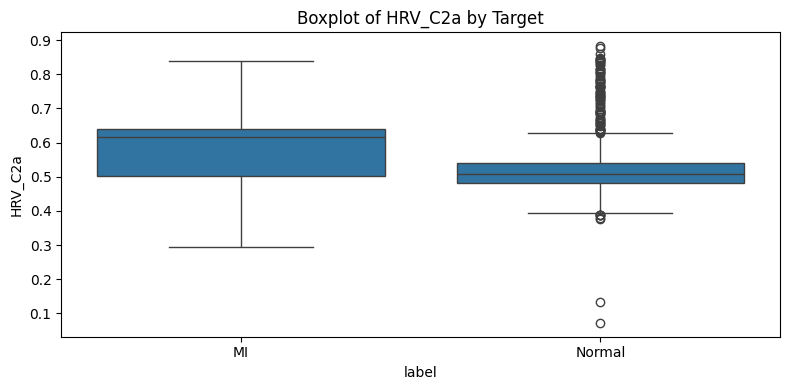

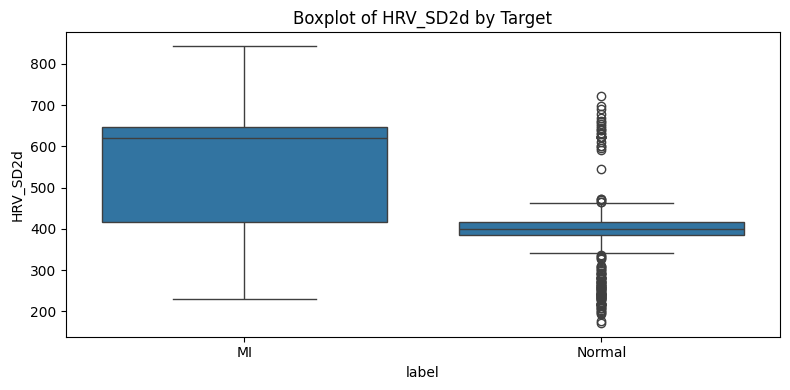

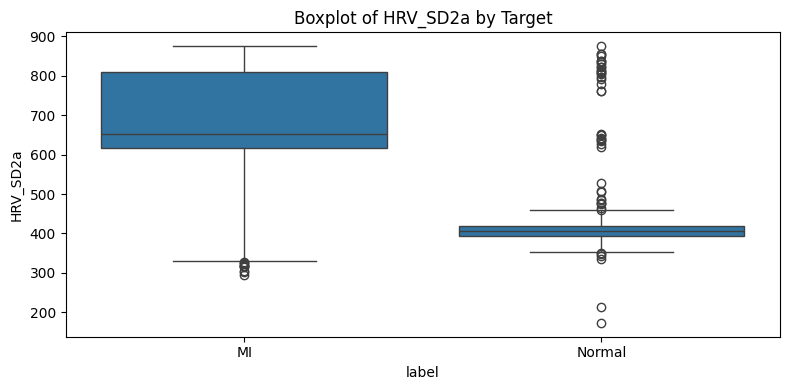

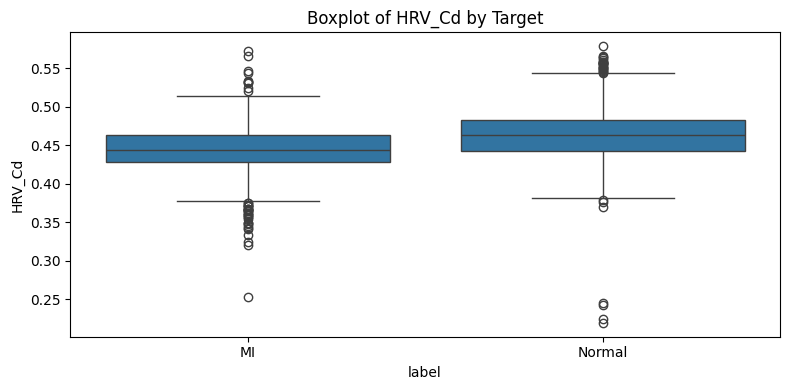

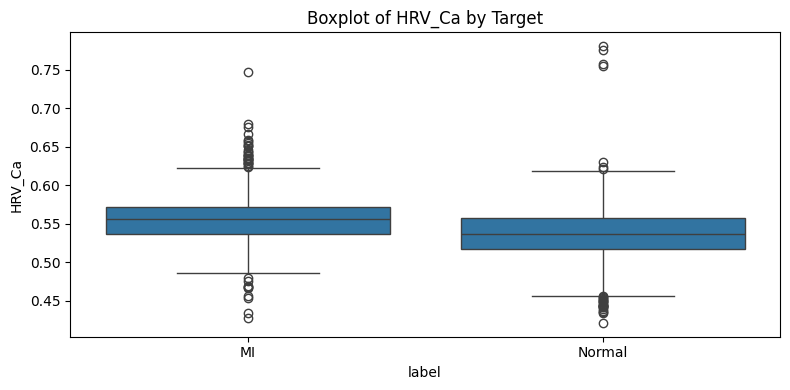

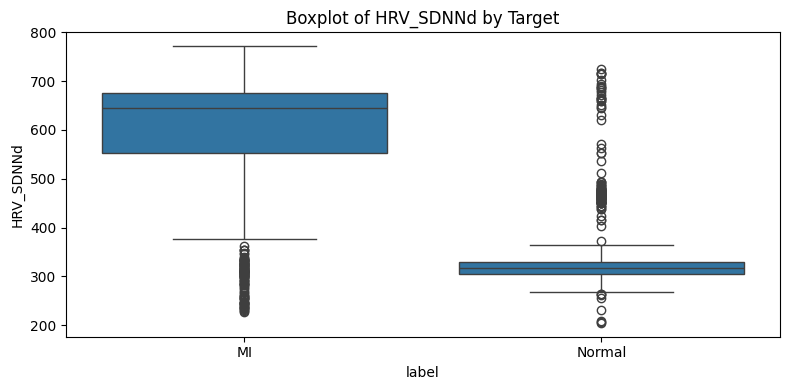

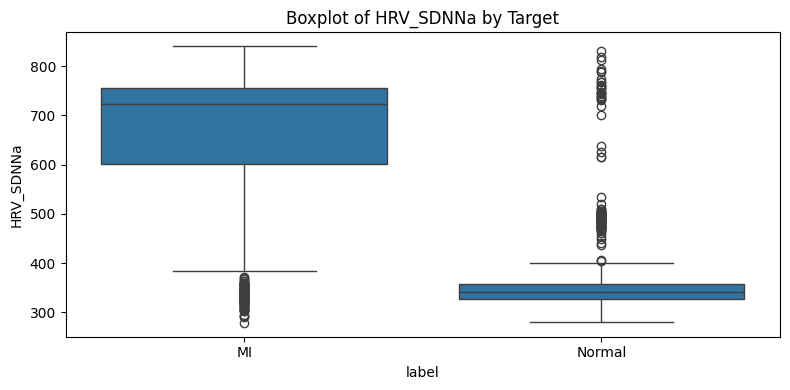

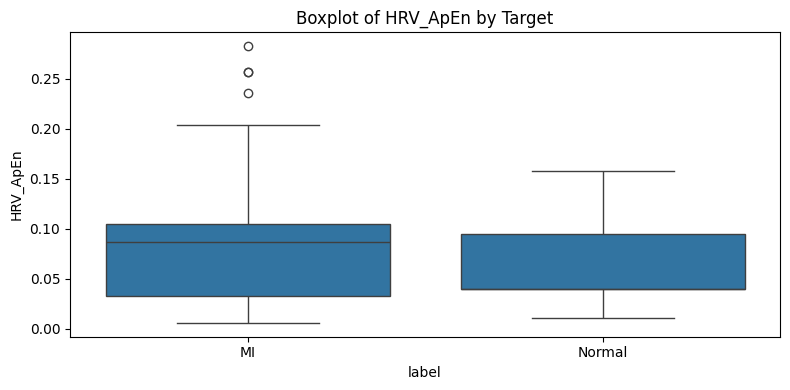

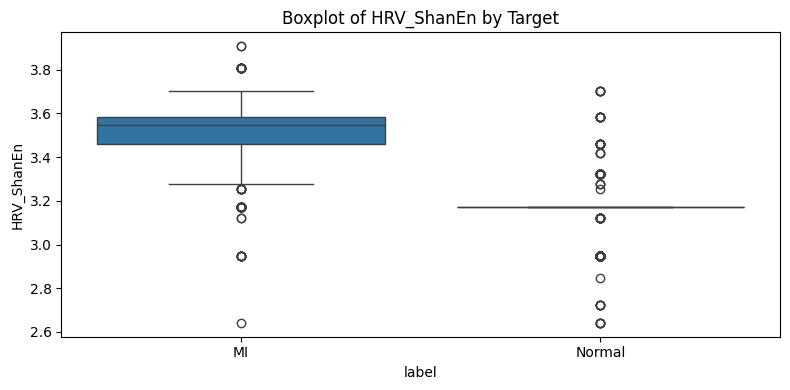

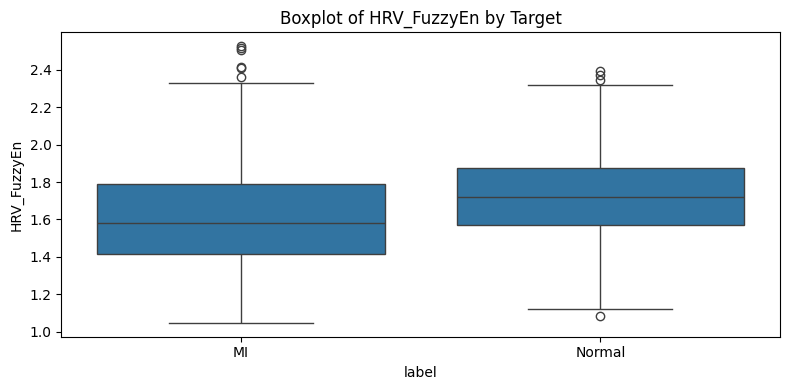

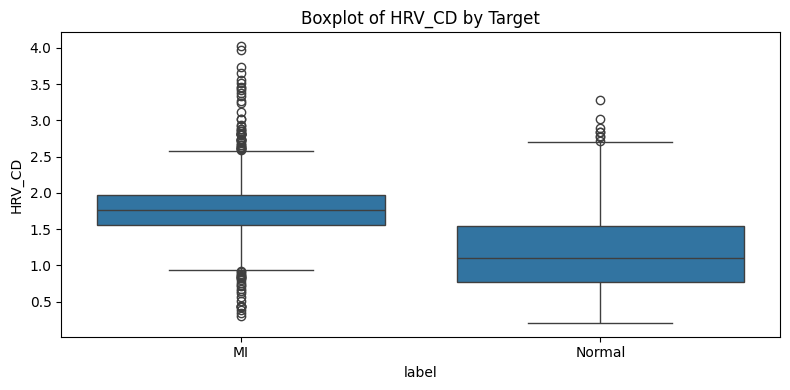

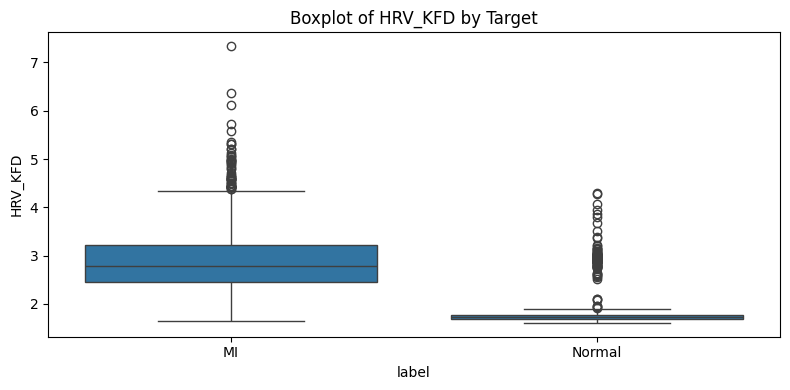

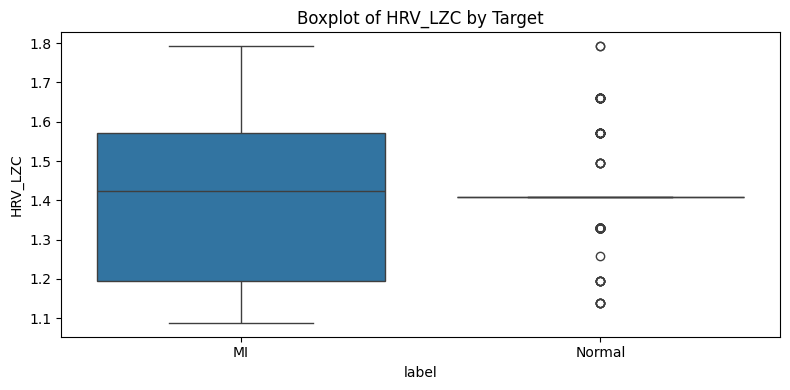

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_clean is your DataFrame with features and the label column
features = df_clean.columns.drop('label')

# Plot boxplot for each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=feature, data=df_clean)
    plt.title(f'Boxplot of {feature} by Target')
    plt.tight_layout()
    plt.show()

 Statistically selected features: ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_MCVNN', 'HRV_IQRNN', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_MinNN', 'HRV_SD1', 'HRV_S', 'HRV_CVI', 'HRV_SD1a', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_ShanEn']
 Dropped correlated features: ['HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MCVNN', 'HRV_Prc20NN', 'HRV_Prc80NN', 'HRV_MinNN', 'HRV_SD1', 'HRV_S', 'HRV_CVI', 'HRV_SD1a', 'HRV_SDNNd', 'HRV_SDNNa', 'HRV_ShanEn']
 Top 10 features by RF importance: ['HRV_MeanNN', 'HRV_IQRNN', 'HRV_SDNN', 'HRV_MadNN']


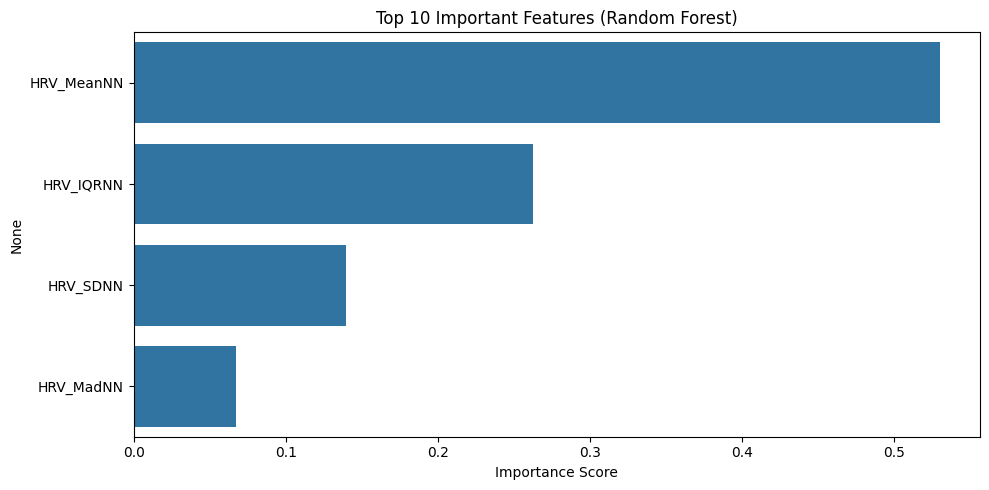

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score



# Separate features and target
X = df_clean.drop(['label'], axis=1)
y = df_clean['label']



# Step 3: Filter-based method (top 20 features)

k = min(20, X.shape[1])  # limit to available features
filter_selector = SelectKBest(score_func=f_classif, k=k)
X_filter = filter_selector.fit_transform(X, y)
selected_filter_cols = X.columns[filter_selector.get_support()]
X = X[selected_filter_cols]

print(" Statistically selected features:", list(selected_filter_cols))


# Step 4: Remove highly correlated features

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X = X.drop(columns=to_drop)

print(" Dropped correlated features:", to_drop)

# Step 5: Feature importance with Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:10]]

print(" Top 10 features by RF importance:", top_features.tolist())

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices[:10]], y=X.columns[indices[:10]])
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assume your top features are:
top_features = ['HRV_MeanNN', 'HRV_IQRNN', 'HRV_SDNN', 'HRV_MadNN' ]

# Prepare data
X_final = X[top_features]
y_final = y

# Encode the string labels to numerical labels
y_final = pd.Series(['Normal' if val == 'Normal' else 'MI' for val in y_final])

label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Normal', 'MI'])  # Manually set class order

y_encoded = label_encoder.transform(y_final)
y_decoded = label_encoder.inverse_transform(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

# Normalize (important for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')  # Use 1 neuron for binary classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=0)

# Predict
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Neural Network Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ Neural Network Accuracy: 0.9632


In [ ]:
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label} --> {i}")


Normal --> 0
MI --> 1


In [ ]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,405 (56.27 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,604 (37.52 KB)

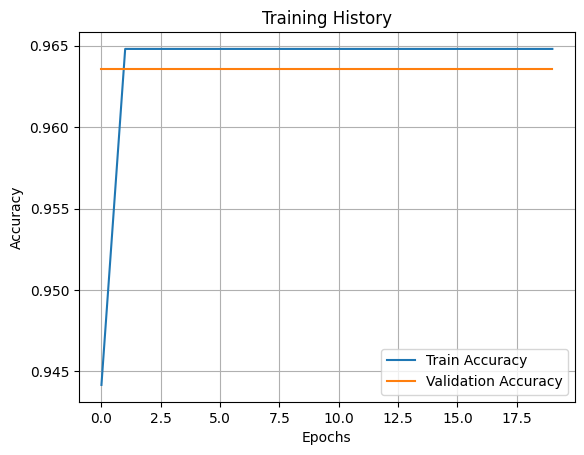

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


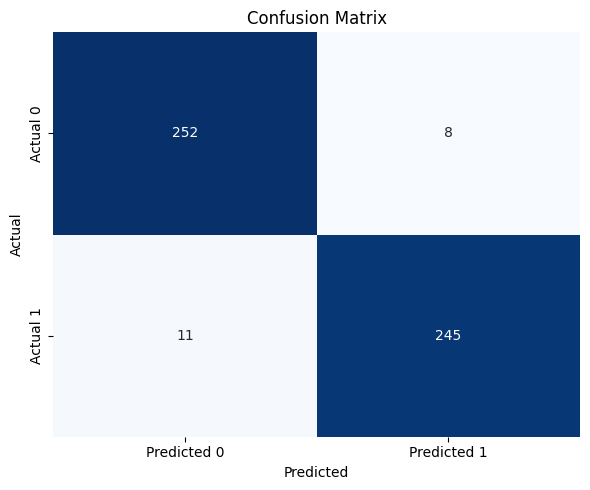

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as colored heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


[[252   8]
 [ 11 245]]
              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       260
          MI       0.97      0.96      0.96       256

    accuracy                           0.96       516
   macro avg       0.96      0.96      0.96       516
weighted avg       0.96      0.96      0.96       516

